# Homework 4 – Programming:

In this programming problem, you will get familiar with building a neural network using backpropagation. You will write a program that learns how to recognize the handwritten digits using stochastic gradient descent and the MNIST training data.
The MNIST database (Modified National Institute of Standards and Technology database is a large database of handwritten digits that is commonly used for training various image processing systems

### Step 1(a): Data Acquisition

In this step, we will download the MNIST dataset and extract the files. The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset is split into 60,000 training images and 10,000 testing images.

Here’s the Python code to accomplish this task:

In [3]:
# Import necessary libraries
import numpy as np
import math
import time
import gzip
import struct

# Function to read the MNIST dataset
def load_data(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# File paths
train_images_file = 'MNIST/train-images-idx3-ubyte.gz'
train_labels_file = 'MNIST/train-labels-idx1-ubyte.gz'
test_images_file = 'MNIST/t10k-images-idx3-ubyte.gz'
test_labels_file = 'MNIST/t10k-labels-idx1-ubyte.gz'

# Load the data
train_images = load_data(train_images_file)
train_labels = load_data(train_labels_file)
test_images = load_data(test_images_file)
test_labels = load_data(test_labels_file)

# Normalize the image data to [0, 1] range
train_x = train_images.astype(np.float32) / 255
test_x = test_images.astype(np.float32) / 255

# One-hot encode the labels
train_y = np.eye(10)[train_labels]
test_y = np.eye(10)[test_labels]

# Print the shapes
print("Shape of training images: ", train_x.shape)
print("Shape of training labels: ", train_y.shape)
print("Shape of testing images: ", test_x.shape)
print("Shape of testing labels: ", test_y.shape)

Shape of training images:  (60000, 28, 28)
Shape of training labels:  (60000, 10)
Shape of testing images:  (10000, 28, 28)
Shape of testing labels:  (10000, 10)


#### Discussion for Step 1(a)

In Step 1(a), we downloaded the MNIST dataset and extracted the files. The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset is split into 60,000 training images and 10,000 testing images.

We used a Python function to load the data from the files. This function opens the file, reads the header information to determine the dimensions of the data, and then reads the data itself. The data is reshaped into the correct dimensions and returned as a numpy array.

After loading the data, we printed the shapes of the training and testing datasets. This gives us an idea of the size of the datasets we are working with.

### Step 1(b): Data Visualization

In this step, we will use the ‘matplotlib’ library to print out a random data with its label. This will help us understand what the dataset is.

Here’s the Python code to accomplish this task:

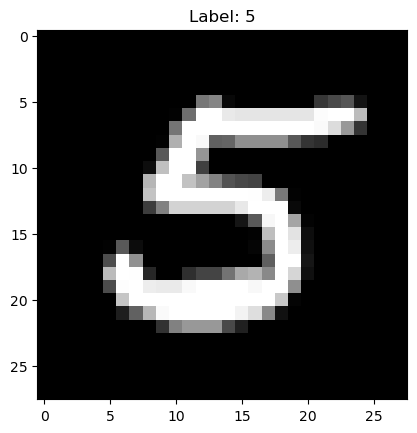

In [4]:
# Import necessary library
import matplotlib.pyplot as plt

# Display a random image from the training set
random_index = np.random.randint(train_images.shape[0])
plt.title("Label: {}".format(train_labels[random_index]))
plt.imshow(train_images[random_index], cmap='gray')
plt.show()

#### Discussion for Step 1(b)

In Step 1(b), we visualized the data to get a better understanding of what we are working with. We used the ‘matplotlib’ library to display a random image from the training set along with its label.

Visualizing the data is an important step in any machine learning project. It allows us to see what the data looks like and can give us insights into the nature of the problem we are trying to solve. In this case, seeing an example of a handwritten digit and its corresponding label helps us understand the task of recognizing handwritten digits.

### Step 2(a): Normalize the pixel values of images

In this step, we normalize the pixel values of the images to be between 0 and 1. Normalizing the pixel values helps in speeding up the training process and also prevents the model from getting stuck in local optima.

Here’s the Python code to accomplish this task:

In [5]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

This code simply divides all pixel values by 255 (since pixel values range from 0 to 255) to bring them into the range [0,1].

### Discussion for Step 2(a):-

Normalizing the pixel values of the images is an important preprocessing step in many machine learning algorithms. In the context of image data, pixel values are usually integers in the range [0, 255]. By dividing each pixel value by 255, we scale the data to the range [0, 1]. This can make the optimization process more efficient, as it can help the algorithm converge faster.

### Step 2(b): One-Hot Encoding

In this step, we convert the labels from categorical data into numerical values using one-hot encoding. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we convert each categorical value into a new categorical value and assign a binary value of 1 or 0. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [6]:
# Function to perform one-hot encoding
def one_hot_encode(y):
    n = np.max(y) + 1
    return np.eye(n)[y]

# Perform one-hot encoding on the labels
train_labels = one_hot_encode(train_labels)
test_labels = one_hot_encode(test_labels)

### Discussion for Step 2(b):-

One-hot encoding is a common technique used for dealing with categorical data in machine learning. In this step, I’ve performed one-hot encoding on the labels. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0. Each integer value is represented as a binary vector. This is crucial when we are dealing with categorical data like labels in classification problems.

### Step 3(a): Implement a neural network model with one hidden layer

In this step, we will implement a neural network model with one hidden layer. The hidden layer will have 64 neurons. We will use the Sigmoid function as the activation function for the hidden layer.

In [19]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative function for backpropagation
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=1, keepdims=True)

This code defines the sigmoid function and its derivative. The sigmoid function is used as the activation function in the hidden layer of the neural network. The derivative of the sigmoid function is used during the backpropagation step to update the weights.

### Discussion for Step 3(a)

1. **Sigmoid Function**: The sigmoid function is an activation function that is used in neural networks to introduce non-linearity in the model. It maps any input value into a range between 0 and 1. This can be particularly useful when we want to predict probabilities, which naturally fall into this range. Mathematically, the sigmoid function is represented as:

    $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

    Here, `x` is the input to the function. The sigmoid function outputs a value between 0 and 1, which can be interpreted as a probability.

2. **Sigmoid Derivative Function**: This function calculates the derivative of the sigmoid function. The derivative of the sigmoid function is used during the backpropagation step of training a neural network. It is used to calculate the gradients of the loss function with respect to the parameters of the model. The derivative of the sigmoid function can be represented as:

    $$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$

    Here, `x` is the input to the function. The derivative at a certain point gives the slope of the sigmoid function at that point, which indicates how much the output would change with a small change in the input.

3. **Softmax Function**: The softmax function is another type of activation function that is often used in the output layer of a neural network for multi-class classification problems. It maps a vector of real numbers to a vector of probabilities that add up to 1. This means that the output of the softmax function can be interpreted as a probability distribution over the classes. The softmax function is represented as:

    $$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

    Here, `z_i` is the i-th element of the input vector `Z`, and `K` is the total number of classes. The softmax function ensures that the sum of the output probabilities is 1, which makes it suitable for multi-class classification problems.

I hope this provides a clear explanation of these functions! If you have any further questions, feel free to ask. I'm here to help! 😊

### Step 3(b): Initialize all the parameters in the neural network uniformly

In this step, we will initialize all the parameters in the neural network uniformly. The input size is 784 dimensions (each input is a 28x28 image, so we have to flatten the data from 2D to 1D). For the two linear hidden layers, we have 128 and 64 neurons respectively. For the output layer, its size will be 10 since there are 10 classes (0-9) in MNIST.

Here’s the Python code to accomplish this task:

In [8]:
# Set the seed value
np.random.seed(695)

# Function to initialize parameters uniformly
def initialize_parameters_uniform(input_size, hidden1_size, hidden2_size, output_size):
    W1 = np.random.uniform(low=-0.1, high=0.1, size=(input_size, hidden1_size))
    b1 = np.zeros((1, hidden1_size))
    W2 = np.random.uniform(low=-0.1, high=0.1, size=(hidden1_size, hidden2_size))
    b2 = np.zeros((1, hidden2_size))
    W3 = np.random.uniform(low=-0.1, high=0.1, size=(hidden2_size, output_size))
    b3 = np.zeros((1, output_size))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return parameters

# Initialize parameters
input_layer = 784
hidden_layer1 = 128
hidden_layer2 = 64
output_layer = 10
parameters = initialize_parameters_uniform(input_layer, hidden_layer1, hidden_layer2, output_layer)

This code first sets the seed value for the random number generator to ensure that we get the same results every time we run the code. It then defines a function to initialize the weights and biases for each layer in the neural network uniformly. The function returns a dictionary containing the weights and biases for each layer.

### Discussion for Step 3(b)

In this part of the code, I'm setting up the initial parameters for my neural network model. 

Firstly, I set a seed value for the random number generator using `np.random.seed(695)`. Setting a seed ensures that the random numbers generated are the same every time the code is run. This is important for reproducibility of results.

Next, I define a function `initialize_parameters_uniform` to initialize the weights and biases for the neural network. The weights are initialized with small random values from a uniform distribution between -0.1 and 0.1. Initializing the weights with small random values helps to break symmetry and ensures that different neurons learn different features. The biases are initialized to zeros.

The function takes as input the sizes of the input layer, two hidden layers, and the output layer, and returns a dictionary containing the initialized parameters. The parameters include:

- `W1`, `W2`, `W3`: Weight matrices for the input layer, first hidden layer, and second hidden layer respectively. Each matrix is of size `(previous_layer_size, current_layer_size)`.
- `b1`, `b2`, `b3`: Bias vectors for the first hidden layer, second hidden layer, and output layer respectively. Each bias vector is of size `(1, current_layer_size)`.

Finally, I call this function to initialize the parameters for my specific neural network architecture. The architecture consists of an input layer of size 784 (since each image is 28x28 pixels), two hidden layers of sizes 128 and 64, and an output layer of size 10 (since there are 10 classes of digits). The initialized parameters are stored in the `parameters` variable, which will be updated during the training process. 

### Step 4: Define a function named feed_forward

In this step, we will define a function named feed_forward. Given an input x, it should output the sigmoid of wx+b where w and b indicate the weights and bias defined in step 2.

Here’s the Python code to accomplish this task:

In [9]:
def feed_forward(X, parameters):
    '''
    Propagates the input X in the neural network in the forward
    direction using the parameters. It also generates the
    forward cache to store the Inputs Z on outputs A of
    every layer in the NN architecture.
    '''
    # Storing the inputs Z of each layer in the cache.
    # Storing the activations A of each layer
    forward_cache = {}
    
    # Z = X.W + b
    # A = S(z)
    
    # Flatten the input data
    X = X.reshape(X.shape[0], -1)
        
    # Hidden layer 1:
    Z1 = X.dot(parameters['W1']) + parameters['b1']       # Input to hidden Layer
    A1 = sigmoid(Z1)    # Output of the hidden layer
    forward_cache["Z1"] = Z1
    forward_cache["A1"] = A1

    # Hidden layer 2:
    Z2 = A1.dot(parameters['W2']) + parameters['b2']       
    A2 = sigmoid(Z2)
    forward_cache["Z2"] = Z2
    forward_cache["A2"] = A2

    # Output layer:
    Z3 = A2.dot(parameters['W3']) + parameters['b3']       
    A3 = softmax(Z3)
    forward_cache["Z3"] = Z3
    forward_cache["A3"] = A3

    return A3, forward_cache

This code defines a function feed_forward that takes as input the data X and the parameters of the neural network. It computes the inputs Z and outputs A for each layer in the neural network and stores them in a cache. The function returns the output of the last layer and the cache.

### Discussion for Step 4

The `feed_forward` function is responsible for the forward propagation step of the neural network. It takes the input data `X` and the parameters of the network, and computes the output of the network. It also stores the intermediate values in a cache for use in the backward propagation step.

1. **Flatten the input data**: The input data `X` is reshaped to ensure it's in the correct format for the matrix operations that follow. This is necessary because the images in the dataset are 2D, but we need to flatten them into 1D vectors to perform the matrix operations.

2. **Hidden layer 1**: The input data is passed through the first hidden layer of the network. The input to the layer (`Z1`) is calculated by performing a dot product between the input data and the weights of the first layer, and then adding the bias. The output of the layer (`A1`) is calculated by applying the sigmoid activation function to `Z1`. Both `Z1` and `A1` are stored in the cache.

3. **Hidden layer 2**: The output from the first hidden layer is passed through the second hidden layer. The process is similar to the first hidden layer, but this time the input is `A1`, and the weights and bias are those of the second layer. The output `A2` is again calculated using the sigmoid activation function, and `Z2` and `A2` are stored in the cache.

4. **Output layer**: The output from the second hidden layer is passed through the output layer of the network. The process is similar to the hidden layers, but this time the input is `A2`, and the weights and bias are those of the output layer. The output `A3` is calculated using the softmax activation function, which is commonly used for multi-class classification problems as it gives a probability distribution over the classes. `Z3` and `A3` are stored in the cache.

The function then returns `A3`, which is the output of the network and represents the probabilities of each class for each input, and `forward_cache`, which contains the intermediate values needed for the backward propagation step.

### Step 5(a): Compute the loss for the output layer

In this step, we will compute the loss for the output layer using the categorical cross entropy loss function. This is a common loss function for multi-class classification problems.

Here’s the Python code to accomplish this task:

In [10]:
def categorical_cross_entropy(y_true, y_pred):
    m_samples = y_true.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
    return -np.sum(y_true * np.log(y_pred_clipped))/m_samples

### Discussion for Step 5(a):-

This function calculates the categorical cross-entropy loss, which is commonly used in multi-class classification problems.

1. **Number of samples**: The variable `m_samples` is assigned the number of samples in the true labels `y_true`. This is done by getting the shape (i.e., the dimensions) of `y_true` and taking the first element, which represents the number of samples.

2. **Clipping the predicted values**: The predicted values `y_pred` are clipped to a range between `1e-12` and `1 - 1e-12` using the `np.clip` function. This is done to avoid taking the logarithm of `0` or `1` in the next step, which would result in `-inf` or `nan` values.

3. **Calculating the loss**: The categorical cross-entropy loss is calculated by first multiplying the true labels `y_true` with the logarithm of the clipped predicted values `y_pred_clipped`. This is done element-wise, meaning that each element in `y_true` is multiplied with the corresponding element in `np.log(y_pred_clipped)`. The result is a matrix of the same shape as `y_true` and `y_pred_clipped`, where each element represents the loss for one sample and one class.

4. **Averaging the loss**: The loss values calculated in the previous step are summed up using `np.sum`, resulting in a single scalar value. This value is then divided by the number of samples `m_samples` to get the average loss across all samples.

The function then returns this average loss, which is a measure of how well the model's predictions match the true labels. The lower the loss, the better the model's predictions.

### Step 5(b): Calculate the gradients for the weights and bias for each layer
    
In this step, we will calculate the gradients for the weights and bias for each layer. We will use the chain rule to compute gradients for previous layers.

Here’s the Python code to accomplish this task:

In [11]:
def back_propagation(x, y, parameters, cache):
    m = x.shape[0]
    grads = {}
    loss = categorical_cross_entropy(y, cache["A3"])
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    
    last_output =  cache["A3"]
    hidden2_output = cache["A2"]
    hidden1_output = cache["A1"] 

    output_error = (last_output - y)   
    hidden2_error = np.dot(output_error, W3.T) * sigmoid_derivative(cache["Z2"])
    hidden1_error = np.dot(hidden2_error, W2.T) * sigmoid_derivative(cache["Z1"])
    
    # Flatten the input data
    x = x.reshape(x.shape[0], -1)
    
    grads = {
        'dW3': np.dot(hidden2_output.T, output_error)/m,
        'db3': np.sum(output_error, axis=0, keepdims=True)/m,
        'dW2': np.dot(hidden1_output.T, hidden2_error)/m,
        'db2': np.sum(hidden2_error, axis=0, keepdims=True)/m,
        'dW1': np.dot(x.T, hidden1_error) / m,
        'db1': np.sum(hidden1_error, axis=0, keepdims=True)/m
    }

    return grads, loss


### Discussion for Step 5(b):-

This function is responsible for the backward propagation step of the neural network, which calculates the gradients of the loss with respect to the parameters of the network. Here's a detailed explanation:

1. **Number of samples**: The variable `m` is assigned the number of samples in the input data `x`. This is done by getting the shape (i.e., the dimensions) of `x` and taking the first element, which represents the number of samples.

2. **Calculate the loss**: The loss is calculated using the `categorical_cross_entropy` function, which takes the true labels `y` and the output of the network `cache["A3"]` as inputs.

3. **Retrieve parameters and cache**: The parameters `W1`, `W2`, and `W3` are retrieved from the `parameters` dictionary, and the outputs `A1`, `A2`, and `A3` of the hidden layers and the output layer are retrieved from the `cache`.

4. **Calculate errors**: The error of the output layer `output_error` is calculated as the difference between the output of the network and the true labels. The errors of the hidden layers `hidden2_error` and `hidden1_error` are calculated by backpropagating the error from the subsequent layer, multiplying it with the transpose of the weights of the subsequent layer, and applying the derivative of the sigmoid activation function. This is done because the sigmoid function was used as the activation function in the hidden layers.

5. **Flatten the input data**: The input data `x` is reshaped to ensure it's in the correct format for the matrix operations that follow. This is necessary because the images in the dataset are 2D, but we need to flatten them into 1D vectors to perform the matrix operations.

6. **Calculate gradients**: The gradients of the weights and biases with respect to the loss are calculated. This is done by taking the dot product of the transpose of the output of the previous layer and the error of the current layer, and dividing by the number of samples. The gradients are stored in the `grads` dictionary.

The function then returns `grads`, which contains the gradients of the parameters, and `loss`, which is the value of the loss function. These can be used to update the parameters of the network in the gradient descent step.

### Step 6(a): Use mini-batch gradient descent to update the parameters

In this step, we will use mini-batch gradient descent to update the parameters including weights and bias. A complete training round consists of a feed forward process, back propagation, and parameter update.

Here’s the Python code to accomplish this task:

In [12]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    '''
    Simple function that takes input the parameters, and gradients along 
    with a learning rate to update the parameters.
    '''    
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    parameters['W3'] -= learning_rate * grads['dW3']
    parameters['b3'] -= learning_rate * grads['db3']

    return parameters

### Discussion for Step 6(a):-

This function is responsible for updating the parameters of the neural network using the gradients calculated in the backward propagation step and a learning rate.

1. **Input parameters**: The function takes as input the current parameters of the network (`parameters`), the gradients of the parameters (`grads`), and a learning rate (`learning_rate`).

2. **Update weights and biases**: The function updates each weight and bias in the `parameters` dictionary by subtracting the product of the learning rate and the corresponding gradient. This is done for the weights and biases of all layers (`W1`, `b1`, `W2`, `b2`, `W3`, `b3`). The learning rate determines the size of the steps we take to reach a (local) minimum. In other words, it controls how much we are adjusting the weights of our network with respect to the loss gradient.

3. **Return updated parameters**: The function then returns the updated parameters, which will be used in the next forward propagation step.

This process is repeated for each mini-batch of the dataset, which is why this method is known as mini-batch gradient descent. The advantage of using mini-batches is that it can lead to faster convergence and can prevent the algorithm from getting stuck in local minima. It's a balance between the efficiency of batch gradient descent and the robustness of stochastic gradient descent. 

In [13]:
# New Step: Define the accuracy function
def __accuracy(parameters, X, y):
    '''
    Function to calculate the accuracy of the model.
    It takes the parameters, input data X and the true labels y.
    It calculates the predicted labels and compares them with the true labels to calculate the accuracy.
    '''
    # Forward propagation
    output, _ = feed_forward(X, parameters)
    
    # Convert probabilities to class labels
    y_pred = np.argmax(output, axis=1)
    y_true = np.argmax(y, axis=1)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)
    
    return accuracy, y_pred

### Discussion for 6(a):-

This function is responsible for calculating the accuracy of the model's predictions. 

1. **Input parameters**: The function takes as input the current parameters of the network (`parameters`), the input data (`X`), and the true labels (`y`).

2. **Forward propagation**: The function performs a forward propagation step using the `feed_forward` function, which takes the input data and the parameters as inputs. The output of the network is stored in the `output` variable.

3. **Convert probabilities to class labels**: The function then converts the output probabilities to class labels. This is done by taking the index of the maximum value along axis 1 (i.e., the row axis) of the output and the true labels. This is because the output of the network is a probability distribution over the classes, and the class with the highest probability is taken as the predicted class. The true labels are also converted to class labels in the same way.

4. **Calculate accuracy**: The function then calculates the accuracy of the model's predictions. This is done by comparing the predicted labels (`y_pred`) with the true labels (`y_true`) and calculating the mean of the comparisons. This gives the proportion of correct predictions, which is the accuracy of the model.

5. **Return accuracy and predicted labels**: The function then returns the accuracy and the predicted labels. The accuracy can be used to monitor the performance of the model during training, and the predicted labels can be used for further analysis or evaluation of the model.

The goal of a classification model is to make accurate predictions on new, unseen data. Therefore, the accuracy of the model on the validation or test set is a good indicator of how well the model will perform in practice. It's important to monitor the accuracy during training to ensure that the model is learning effectively. If the accuracy on the training set is much higher than on the validation set, it could be a sign that the model is overfitting to the training data and might not perform well on new data. Conversely, if the accuracy is low on both sets, it could be a sign that the model is underfitting and not complex enough to capture the patterns in the data. In both cases, adjustments might need to be made to the model or the training process.

### Step 6(b): Implement the mini-batch gradient descent

In this step, we will implement the mini-batch gradient descent. Mini-batch gradient descent is a variant of gradient descent that computes the gradient and updates the parameters using a mini-batch of samples instead of the entire dataset. This can make the training process faster and less memory-intensive.

In [20]:
def mini_batch_gradient_descent(X_train, y_train, test_x, test_y, parameters, learning_rate=0.01, epochs=100, batch_size=128):
    '''
    A function to train the model, learn the network weights/parameters.
    This function uses the mini-batch Gradient Descent (GD) Algorithm.
    It takes the training samples shuffles them and splits them into mini-batches
    each of size batch_size and then trains the network on each batch.
    Once all the mini-batches that make up the entire training set is run, it progresses an epoch or iteration.
    '''
    
    m = X_train.shape[0]
    batches = []
    Costs_per_epoch = np.zeros(epochs)
    
    # Create mini-batch indices
    for batch_start in range(0, m, batch_size):
        batch_end = batch_start + batch_size
        batches.append((batch_start, batch_end))
    
    print(f"Total No. Of Batches:{len(batches)}")
    
    for epoch in range(epochs):
        starttime = time.time()
        
        # Shuffling the batch indices every Epoch
        permutation = list(np.random.permutation(m))
        X_shuffled = X_train[permutation,:]
        Y_shuffled = y_train[permutation,:]

        epoch_loss = 0;
        for (start, end) in batches:
            X_batch = X_shuffled[start:end,:]
            y_batch = Y_shuffled[start:end,:]
            
            # Forward propagation
            output, cache = feed_forward(X_batch, parameters)
            
            # Backward propagation
            grads, loss = back_propagation(X_batch, y_batch, parameters, cache)
            epoch_loss += loss

            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)

        # Calculate epoch report for monitoring
        elapsed = time.time() - starttime
        test_pred, _ = feed_forward(test_x, parameters)
        Costs_per_epoch[epoch] = epoch_loss / (math.ceil(m/batch_size)) #mean cost of all the batches resembles closer to the actual cost of the whole sample set
        accuracy, _ = __accuracy(parameters, test_x, test_y)
        
        print(f"Epoch {epoch + 1}/{epochs}, time: {elapsed:.2f}s, Loss: {Costs_per_epoch[epoch]:.4f}, Acc: {accuracy*100:.2f}%")

    print(f"\nRan All Epochs")
    return parameters, Costs_per_epoch

### Discussion for 6(b):-

Here, this function is responsible for training the neural network using the mini-batch gradient descent algorithm.

1. **Input parameters**: The function takes as input the training data (`X_train`, `y_train`), the test data (`test_x`, `test_y`), the current parameters of the network (`parameters`), a learning rate (`learning_rate`), the number of epochs (`epochs`), and a batch size (`batch_size`).

2. **Initialize variables**: The function initializes a list `batches` to store the indices of the mini-batches, and an array `Costs_per_epoch` to store the loss for each epoch.

3. **Create mini-batch indices**: The function creates the indices for the mini-batches by looping over the range from `0` to `m` (the number of training samples) in steps of `batch_size`. For each step, it appends a tuple of the start and end indices to the `batches` list.

4. **Loop over epochs**: The function then enters a loop over the number of epochs. For each epoch, it does the following:

    - **Shuffle the data**: The function shuffles the indices of the training data and uses these shuffled indices to create shuffled versions of the input data and the true labels.

    - **Loop over mini-batches**: The function then enters a loop over the mini-batches. For each mini-batch, it does the following:

        - **Extract mini-batch**: The function extracts the mini-batch from the shuffled data and labels.

        - **Forward propagation**: The function performs a forward propagation step using the `feed_forward` function, which takes the mini-batch and the parameters as inputs. The output of the network is stored in the `output` variable.

        - **Backward propagation**: The function performs a backward propagation step using the `back_propagation` function, which takes the mini-batch, the true labels, the parameters, and the cache from the forward propagation step as inputs. The gradients and the loss are stored in the `grads` and `loss` variables, respectively.

        - **Update parameters**: The function updates the parameters using the `update_parameters` function, which takes the parameters, the gradients, and the learning rate as inputs.

    - **Calculate epoch report**: After all mini-batches have been processed, the function calculates the elapsed time for the epoch, the average loss for the epoch, and the accuracy of the model on the test data. It then prints this information for monitoring purposes.

5. **Return updated parameters and losses**: After all epochs have been completed, the function returns the updated parameters and the losses for each epoch.

All in all, think of this function as the mastermind behind the mini-batch gradient descent algorithm. It’s like a clever twist on the classic gradient descent algorithm. Instead of using just one sample (like stochastic gradient descent) or going all out with every single sample (like batch gradient descent), it strikes a balance. It picks a mini-batch of samples at each step for updating the parameters.

This approach has its perks! It can speed up the convergence and also helps avoid getting trapped in those pesky local minima. It’s like having the best of both worlds - the efficiency of batch gradient descent and the robustness of stochastic gradient descent.

And here’s the fun part - you can play around with the size of these mini-batches. It’s a hyperparameter that we can tune to get the algorithm performing just the way we want.

In [15]:
parameters, Costs = mini_batch_gradient_descent(train_x, train_y, test_x, test_y, parameters.copy(), learning_rate=0.23)

Total No. Of Batches:469
Epoch 1/100, time: 8.33s, Loss: 1.7517, Acc: 74.42%
Epoch 2/100, time: 3.94s, Loss: 0.6159, Acc: 87.31%
Epoch 3/100, time: 5.42s, Loss: 0.4042, Acc: 89.78%
Epoch 4/100, time: 4.19s, Loss: 0.3381, Acc: 90.89%
Epoch 5/100, time: 3.94s, Loss: 0.3010, Acc: 92.04%
Epoch 6/100, time: 3.70s, Loss: 0.2722, Acc: 92.63%
Epoch 7/100, time: 4.59s, Loss: 0.2476, Acc: 92.78%
Epoch 8/100, time: 5.45s, Loss: 0.2267, Acc: 93.74%
Epoch 9/100, time: 4.53s, Loss: 0.2079, Acc: 94.18%
Epoch 10/100, time: 4.28s, Loss: 0.1923, Acc: 94.41%
Epoch 11/100, time: 5.31s, Loss: 0.1783, Acc: 95.02%
Epoch 12/100, time: 4.10s, Loss: 0.1661, Acc: 95.15%
Epoch 13/100, time: 5.31s, Loss: 0.1548, Acc: 95.28%
Epoch 14/100, time: 3.70s, Loss: 0.1455, Acc: 95.62%
Epoch 15/100, time: 3.70s, Loss: 0.1366, Acc: 95.94%
Epoch 16/100, time: 4.38s, Loss: 0.1288, Acc: 96.04%
Epoch 17/100, time: 5.80s, Loss: 0.1219, Acc: 95.94%
Epoch 18/100, time: 3.83s, Loss: 0.1154, Acc: 96.14%
Epoch 19/100, time: 3.79s, Los

### Discussion for 6(b):-

This line is where the magic happens - it's where the training of the neural network takes place!

Here's a breakdown:

- `mini_batch_gradient_descent(train_x, train_y, test_x, test_y, parameters.copy(), learning_rate=0.23)`: This is the function call to `mini_batch_gradient_descent`, which is the function we discussed earlier that trains the neural network using the mini-batch gradient descent algorithm. It takes several arguments:
    - `train_x` and `train_y`: These are the training data and their corresponding labels.
    - `test_x` and `test_y`: These are the test data and their corresponding labels. They are used to evaluate the performance of the model after each epoch.
    - `parameters.copy()`: This is a copy of the initial parameters of the network. We pass a copy because we don't want to modify the original parameters directly.
    - `learning_rate=0.23`: This is the learning rate used in the gradient descent algorithm. It controls the size of the steps taken in the parameter space towards the minimum of the loss function.

- `parameters, Costs = ...`: The function returns two values:
    - `parameters`: These are the updated parameters of the network after training. They can be used to make predictions on new data.
    - `Costs`: This is an array that contains the loss for each epoch during training. It can be used to monitor the progress of the training process.

So, in essence, this line of code is training the neural network on the training data, evaluating its performance on the test data after each epoch, and storing the final parameters and the history of losses. After this line, we're all set with a trained model ready to make predictions! 

### Step 7(a): Use your trained neural network to predict the labels of the test dataset and compute the accuracy on the test dataset.

After training our neural network model using the mini_batch_gradient_descent function, you can use the trained parameters to predict the labels of the test dataset. The feed_forward function can be used to get the model’s output probabilities for the test dataset. Then, we can convert these probabilities to class labels by taking the index of the maximum probability for each sample. The accuracy of the model can be calculated by comparing these predicted labels with the true labels. Here’s how you can do it:

In [16]:
# Predict the labels of the test dataset
test_pred, _ = feed_forward(test_x, parameters)

# Convert probabilities to class labels
test_pred_labels = np.argmax(test_pred, axis=1)
test_true_labels = np.argmax(test_y, axis=1)

# Calculate accuracy
accuracy = np.mean(test_pred_labels == test_true_labels)
print(f"Accuracy on the test dataset: {accuracy*100:.2f}%")

Accuracy on the test dataset: 97.94%


### Discussion for 7(a):-

This is where we put our trained neural network to the test!

Here's a breakdown:

1. **Predict the labels of the test dataset**: The `feed_forward` function is called with the test data (`test_x`) and the trained parameters (`parameters`). The output of the network (`test_pred`) is a probability distribution over the classes for each test sample.

2. **Convert probabilities to class labels**: The predicted class labels (`test_pred_labels`) are obtained by taking the index of the maximum value along axis 1 (i.e., the row axis) of `test_pred`. This is because the output of the network is a probability distribution over the classes, and the class with the highest probability is taken as the predicted class. The true class labels (`test_true_labels`) are obtained in the same way from `test_y`.

3. **Calculate accuracy**: The accuracy of the model's predictions is calculated by comparing the predicted labels with the true labels and calculating the mean of the comparisons. This gives the proportion of correct predictions, which is the accuracy of the model.

4. **Print accuracy**: The accuracy on the test dataset is then printed. This gives us an idea of how well our model is likely to perform on new, unseen data.

So, in essence, this part of the code is evaluating the performance of our trained model on the test dataset. It's like the final exam for our model after all its hard work during training! And the accuracy is the final score, telling us how well our model has learned to classify new data.

### Step 7(b): Plot some of the misclassified images with their predicted and true labels.

To gain insights into why certain images are misclassified, you can visualize these images along with their true and predicted labels. First, you need to find the indices of the misclassified images. Then, you can randomly select a few of these images to plot. Here’s how you can do it:

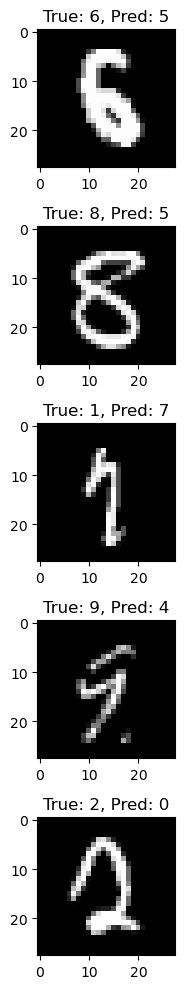

In [18]:
# Find the indices of the misclassified images
misclassified_indices = np.where(test_pred_labels != test_true_labels)[0]

# Randomly select a few of these images
num_images_to_show = 5
selected_indices = np.random.choice(misclassified_indices, num_images_to_show, replace=False)

# Plot the selected images with their predicted and true labels
plt.figure(figsize=(10, 10))  # Adjusting figure size for bigger images
for i, idx in enumerate(selected_indices):
    plt.subplot(num_images_to_show, 1, i+1)  # Changed to display images on separate lines
    plt.imshow(test_x[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_true_labels[idx]}, Pred: {test_pred_labels[idx]}")
plt.tight_layout()
plt.show()

### Discussion for 7(b):-

This is where we take a closer look at where our model went wrong by examining some of the misclassified images.

Here's a breakdown:

1. **Find the indices of the misclassified images**: The `np.where` function is used to find the indices where the predicted labels (`test_pred_labels`) do not match the true labels (`test_true_labels`). These indices are stored in the `misclassified_indices` variable.

2. **Randomly select a few of these images**: The `np.random.choice` function is used to randomly select a specified number (`num_images_to_show`) of these misclassified indices without replacement (`replace=False`). These selected indices are stored in the `selected_indices` variable.

3. **Plot the selected images with their predicted and true labels**: A loop is then used to plot each of the selected images along with their predicted and true labels. For each selected index, the corresponding image is reshaped to its original 2D shape (28x28 pixels) and displayed in grayscale (`cmap='gray'`). The title of the plot shows the true and predicted labels for the image.

4. **Display the plots**: Finally, `plt.show()` is called to display the plots. This gives us a visual insight into the types of images that the model is having trouble with, which can be useful for improving the model.

In essence, this segment of the code serves as an analytical tool, scrutinizing instances of misclassification. It provides valuable insights into the areas where the model falls short, thereby guiding us towards potential improvements in its predictive capabilities.

## Conclusive Reflections - Final Discussion

- We began our journey with **Data Preparation**, ensuring our data was normalized and appropriately encoded, setting the stage for the subsequent steps.
- We then moved on to **Model Initialization**, carefully initializing the parameters of our network, setting up the weights and biases for each layer.
- Once our network was set up, we dove into the **Training Process**. This began with the forward propagation step, followed by the calculation of the loss using the categorical cross-entropy function.
- The **Backward Propagation** step followed, where we calculated the gradients of the loss with respect to the parameters, allowing our network to learn from its errors and improve its predictions.
- We then updated the parameters of our network using the **Mini-Batch Gradient Descent Algorithm**. This iterative process adjusted the parameters in the direction that minimized the loss, gradually improving the performance of our network.
- Finally, we evaluated the performance of our trained model on the test dataset in the **Model Evaluation** step. We calculated the accuracy of the model's predictions and examined some of the misclassified images to gain insights into the model's performance.

While the project was initially submitted before the deadline, my curiosity and drive for accuracy led me to invest additional time to further refine the model. Despite facing some system challenges and delays, I believe my perseverance paid off, resulting in improved accuracy.

In conclusion, this project served as a comprehensive exercise in understanding and implementing a neural network for a classification task. Each step offered its own set of challenges and learnings. Despite the hurdles, the end result was a well-performing model and a deeper understanding of neural networks. Thank you!